In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Carregar o dataset
df = pd.read_csv ("dados_financeiros.csv")

In [3]:
df.head()

,data_vencimento,data_recebimento,nome_cliente,valor,situacao,forma_pagamento,mes_contrato
0,10-01-2024,NaN,Cliente_1_1,312.99,em aberto,Boleto,Contrato 1/2024
1,05-01-2024,02-01-2024,Cliente_1_2,295.65,recebido,Boleto,Contrato 1/2024
2,05-01-2024,06-01-2024,Cliente_1_3,676.75,recebido,Cartão de Crédito,Contrato 1/2024
3,05-01-2024,NaN,Cliente_1_4,810.68,em aberto,Pix,Contrato 1/2024
4,30-01-2024,NaN,Cliente_1_5,911.73,em aberto,Cartão de Crédito,Contrato 1/2024


## Análise de Inadimplência

### 1. Qual a taxa de inadimplência por mês?

In [4]:
# Filtrar clientes inadimplentes
inadimplentes = df[df['situacao'] == 'em aberto']

# Contar o total de clientes por mês e o número de inadimplentes por mês
inadimplencia_por_mes = inadimplentes.groupby('mes_contrato').size()

# Contar o total de clientes por mês
total_por_mes = df.groupby('mes_contrato').size()

# Calcular a taxa de inadimplência (inadimplentes / total de clientes) * 100 para retornar o percentual
taxa_inadimplencia = (inadimplencia_por_mes / total_por_mes) * 100

# Exibir a taxa de inadimplência por mês
print(taxa_inadimplencia)

mes_contrato
Contrato 1/2024    52.000000
Contrato 2/2024    57.534247
Contrato 3/2024    47.368421
Contrato 4/2024    49.673203
Contrato 5/2024    51.592357
Contrato 6/2024    50.322581
dtype: float64


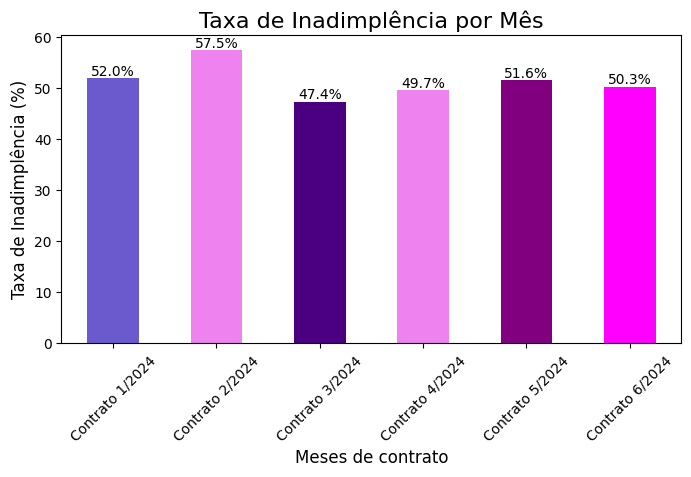

In [5]:
# Definindo as cores
cores = ['slateblue', 'violet', 'indigo', 'violet', 'purple', 'magenta']

# Criando o gráfico de barras
ax = taxa_inadimplencia.plot(kind='bar', color=cores, figsize=(8, 4))

# Adicionando título e rótulos
ax.set_title('Taxa de Inadimplência por Mês', fontsize=16)
ax.set_xlabel('Meses de contrato', fontsize=12)
ax.set_ylabel('Taxa de Inadimplência (%)', fontsize=12)

# Adicionando rótulos de dados de forma simples
ax.bar_label(ax.containers[0], fmt='%.1f%%', fontsize=10, color='black')

plt.xticks(rotation=45)
plt.show()

## 2. Quais meses têm mais inadimplência?

In [6]:
# Meses com mais inadimplentes
meses_com_mais_inadimplentes = inadimplencia_por_mes.sort_values(ascending=False)

# Exibir os meses com mais inadimplentes
print(meses_com_mais_inadimplentes)

mes_contrato
Contrato 2/2024    84
Contrato 5/2024    81
Contrato 1/2024    78
Contrato 6/2024    78
Contrato 4/2024    76
Contrato 3/2024    72
dtype: int64


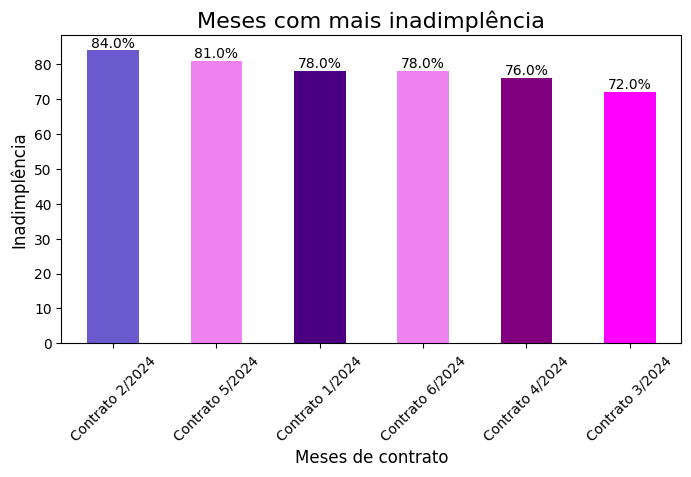

In [7]:
# Definindo as cores
cores = ['slateblue', 'violet', 'indigo', 'violet', 'purple', 'magenta']

# Criando o gráfico de barras
ax = meses_com_mais_inadimplentes.plot(kind='bar', color=cores, figsize=(8, 4))

ax.set_title('Meses com mais inadimplência', fontsize=16)
ax.set_xlabel('Meses de contrato', fontsize=12)
ax.set_ylabel('Inadimplência', fontsize=12)

ax.bar_label(ax.containers[0], fmt='%.1f%%', fontsize=10, color='black')

plt.xticks(rotation=45)
plt.show()

### 3. Qual é o total de valores em aberto por mês?

In [8]:
# Filtrar apenas os registros em aberto
valores_em_aberto = df[df['situacao'] == 'em aberto']

# Somar os valores em aberto por mês
total_em_aberto_por_mes = valores_em_aberto.groupby('mes_contrato')['valor'].sum()

# Exibir o total de valores em aberto por mês
print(total_em_aberto_por_mes)

mes_contrato
Contrato 1/2024    44066.01
Contrato 2/2024    44864.25
Contrato 3/2024    36981.35
Contrato 4/2024    41261.27
Contrato 5/2024    43342.09
Contrato 6/2024    43211.13
Name: valor, dtype: float64


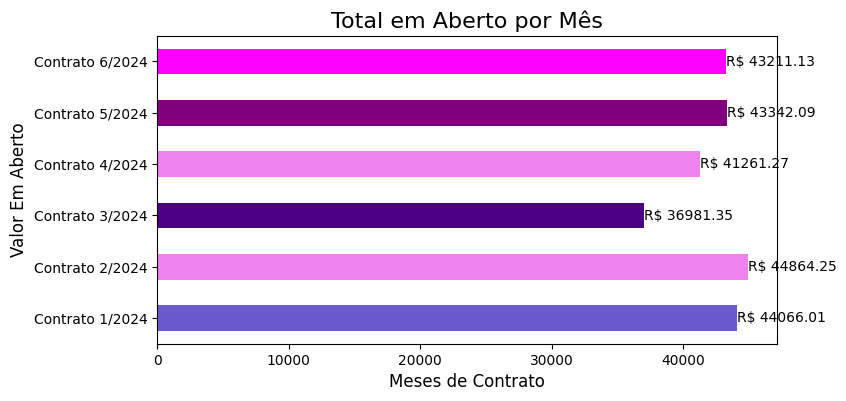

In [9]:
# Definindo as cores
cores = ['slateblue', 'violet', 'indigo', 'violet', 'purple', 'magenta']

ax = total_em_aberto_por_mes.plot(kind='barh', color = cores, figsize=(8,4))

ax.set_title('Total em Aberto por Mês', fontsize = 16)
ax.set_xlabel('Meses de Contrato', fontsize = 12)
ax.set_ylabel('Valor Em Aberto', fontsize = 12)

ax.bar_label(ax.containers[0], fmt='R$ %.2f', fontsize=10, color='black')

plt.show()

## Análise de Pagamentos

### 1. Qual a média de dias de atraso nos pagamentos?

In [10]:
# Primeiro, vamos garantir que a coluna 'data_vencimento' e 'data_recebimento' são do tipo datetime
df['data_vencimento'] = pd.to_datetime(df['data_vencimento'], format='%d-%m-%Y')
df['data_recebimento'] = pd.to_datetime(df['data_recebimento'], format='%d-%m-%Y', errors='coerce')

# errors='coerce' -> Isso fará com que os valores inválidos (que não podem ser convertidos para data) sejam transformados
# em NaT (Not a Time), que é o equivalente de NaN para dados de data e hora.

# Calcular o atraso em dias (somente para os pagamentos realizados)
df['dias_atraso'] = (df['data_recebimento'] - df['data_vencimento']).dt.days

# Filtrar apenas os registros onde houve atraso
atrasos = df[df['dias_atraso'] > 0]

# Calcular a média de dias de atraso
media_atraso = atrasos['dias_atraso'].mean()

print(f'Média de dias de atraso nos pagamentos: {media_atraso:.2f} dias')

Média de dias de atraso nos pagamentos: 8.09 dias


### 2. Qual o percentual de pagamentos realizados antes do vencimento?

In [11]:
# Filtrar os pagamentos realizados antes do vencimento
pagamentos_antes_vencimento = df[df['dias_atraso'] < 0]

# Calcular o percentual de pagamentos realizados antes do vencimento
percentual_antes_vencimento = (len(pagamentos_antes_vencimento) / len(df[df['data_recebimento'].notnull()])) * 100

print(f'Percentual de pagamentos realizados antes do vencimento: {percentual_antes_vencimento:.2f}%')

Percentual de pagamentos realizados antes do vencimento: 29.28%


### 3. Qual a forma de pagamento mais utilizada?

In [12]:
# Contar a frequência de cada forma de pagamento
forma_pagamento_mais_utilizada = df['forma_pagamento'].value_counts().idxmax()

print(f'A forma de pagamento mais utilizada é: {forma_pagamento_mais_utilizada}')

A forma de pagamento mais utilizada é: Cartão de Crédito


## Análise de Receita e Valor

### 1. Qual o total de valor recebido por mês?

In [13]:
# Filtrando os pagamentos recebidos
pagamentos_recebidos = df[df['situacao'] == 'recebido']

# Agrupando por mês e somando os valores recebidos
total_recebido_por_mes = pagamentos_recebidos.groupby('mes_contrato')['valor'].sum()

print(total_recebido_por_mes)

mes_contrato
Contrato 1/2024    38452.22
Contrato 2/2024    36776.91
Contrato 3/2024    44063.20
Contrato 4/2024    43433.58
Contrato 5/2024    40945.85
Contrato 6/2024    46377.96
Name: valor, dtype: float64


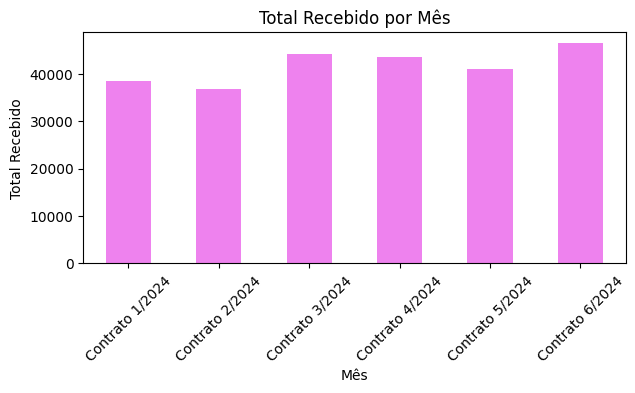

In [25]:
# Exibindo o gráfico
plt.figure(figsize=(7,3))
total_recebido_por_mes.plot(kind='bar', color='violet')
plt.title('Total Recebido por Mês')
plt.xlabel('Mês')
plt.ylabel('Total Recebido')
plt.xticks(rotation=45)
plt.show()

### 2. Qual é o valor médio dos contratos por mês?

In [14]:
# Agrupando por mês e calculando a média do valor dos contratos
media_valor_contratos_por_mes = df.groupby('mes_contrato')['valor'].mean()

print(media_valor_contratos_por_mes)

mes_contrato
Contrato 1/2024    550.121533
Contrato 2/2024    559.186027
Contrato 3/2024    533.187829
Contrato 4/2024    553.561111
Contrato 5/2024    536.865860
Contrato 6/2024    577.994129
Name: valor, dtype: float64


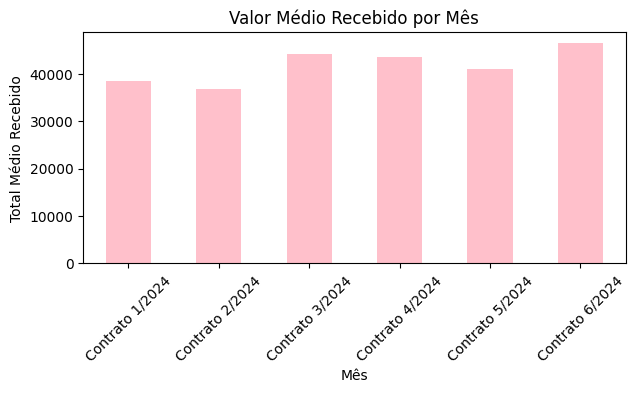

In [28]:
# Exibindo o gráfico
plt.figure(figsize=(7,3))
total_recebido_por_mes.plot(kind='bar', color='pink')
plt.title('Valor Médio Recebido por Mês')
plt.xlabel('Mês')
plt.ylabel('Total Médio Recebido')
plt.xticks(rotation=45)
plt.show()

### 3. Qual é o valor médio de inadimplência por mês?

In [15]:
# Filtrando os contratos em aberto (inadimplentes)
inadimplentes = df[df['situacao'] == 'em aberto']

# Agrupando por mês e calculando a média do valor de inadimplência
media_inadimplencia_por_mes = inadimplentes.groupby('mes_contrato')['valor'].mean()

print(media_inadimplencia_por_mes)

mes_contrato
Contrato 1/2024    564.948846
Contrato 2/2024    534.098214
Contrato 3/2024    513.629861
Contrato 4/2024    542.911447
Contrato 5/2024    535.087531
Contrato 6/2024    553.988846
Name: valor, dtype: float64


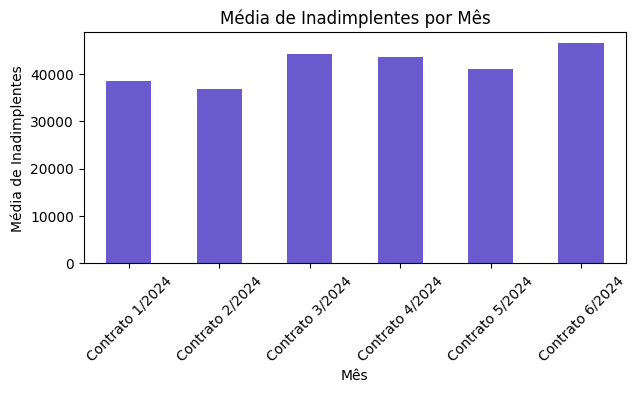

In [29]:
# Exibindo o gráfico
plt.figure(figsize=(7,3))
total_recebido_por_mes.plot(kind='bar', color='slateblue')
plt.title('Média de Inadimplentes por Mês')
plt.xlabel('Mês')
plt.ylabel('Média de Inadimplentes')
plt.xticks(rotation=45)
plt.show()

## Análise de Clientes

### 1. Quantos clientes não renovaram o contrato em um dado mês?

In [16]:
# Contando quantos clientes não pagaram no mês subsequente ao mês de renovação do contrato.
nao_renovaram = df[df['situacao'] == 'em aberto']

# Agrupar por cliente e mês para identificar se algum cliente não pagou em um mês
clientes_nao_renovaram = nao_renovaram.groupby(['nome_cliente', 'mes_contrato']).size().reset_index(name="contagem")

# Filtrando clientes que não renovaram (não pagaram)
clientes_nao_renovaram = clientes_nao_renovaram[clientes_nao_renovaram['contagem'] == 1]

# Contando o número total de clientes que não renovaram
quantidade_nao_renovaram = clientes_nao_renovaram['nome_cliente'].nunique()
print(f"Clientes que não renovaram o contrato: {quantidade_nao_renovaram}")

Clientes que não renovaram o contrato: 469


### 2. Qual a média de contratos por cliente ao longo do tempo?

In [17]:
# Contando o número total de contratos (registros) por cliente
total_contratos_por_cliente = df.groupby('nome_cliente').size()

# Calculando a média de contratos por cliente
media_contratos_por_cliente = total_contratos_por_cliente.mean()
print(f"Média de contratos por cliente: {media_contratos_por_cliente}")

Média de contratos por cliente: 1.0


### 3. Qual o cliente com o maior valor em aberto?

In [18]:
# Filtrando os contratos em aberto (inadimplentes)
inadimplentes = df[df['situacao'] == 'em aberto']

# Agrupando por cliente e somando os valores em aberto
valor_em_aberto_por_cliente = inadimplentes.groupby('nome_cliente')['valor'].sum()

# Encontrando o cliente com o maior valor em aberto
cliente_maior_valor_aberto = valor_em_aberto_por_cliente.idxmax()
maior_valor_aberto = valor_em_aberto_por_cliente.max()

print(f"Cliente com maior valor em aberto: {cliente_maior_valor_aberto} com valor de R${maior_valor_aberto:.2f}")

Cliente com maior valor em aberto: Cliente_1_85 com valor de R$999.75


## Segmentação e Análise de Sazonalidade

### 1. Como a inadimplência varia entre as formas de pagamento?

In [19]:
# Filtrando os registros de inadimplência
inadimplentes = df[df['situacao'] == 'em aberto']

# Contando o total de inadimplentes por forma de pagamento
inadimplencia_por_pagamento = inadimplentes.groupby('forma_pagamento').size()

# Contando o total de registros por forma de pagamento (independente da situação)
total_por_pagamento = df.groupby('forma_pagamento').size()

# Calculando a taxa de inadimplência por forma de pagamento
taxa_inadimplencia_por_pagamento = (inadimplencia_por_pagamento / total_por_pagamento) * 100

# Exibindo o resultado
print(taxa_inadimplencia_por_pagamento)

forma_pagamento
Boleto               51.186441
Cartão de Crédito    55.076923
Pix                  47.440273
dtype: float64


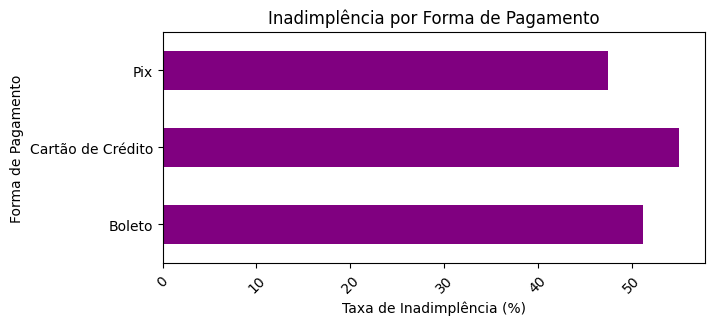

In [39]:
# Exibindo o gráfico
plt.figure(figsize=(7,3))
taxa_inadimplencia_por_pagamento.plot(kind='barh', color='purple')
plt.title('Inadimplência por Forma de Pagamento')
plt.xlabel('Taxa de Inadimplência (%)')
plt.ylabel('Forma de Pagamento')
plt.xticks(rotation=45)
plt.show()

### 2. Existe alguma sazonalidade nas renovações de contrato?

In [20]:
# Contando o número de renovações por mês
renovacoes_por_mes = df.groupby('mes_contrato').size()

renovacoes_por_mes

mes_contrato
Contrato 1/2024    150
Contrato 2/2024    146
Contrato 3/2024    152
Contrato 4/2024    153
Contrato 5/2024    157
Contrato 6/2024    155
dtype: int64

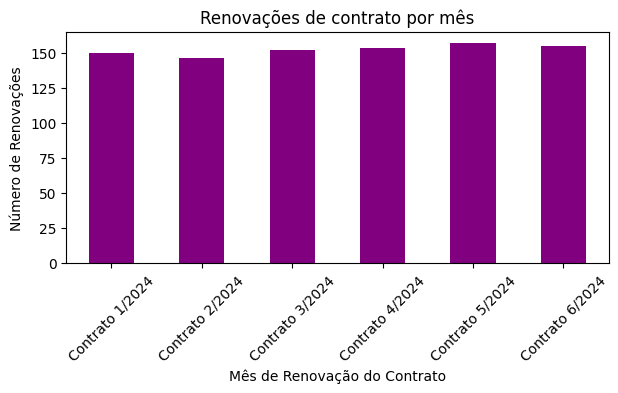

In [40]:
# Exibindo o gráfico
plt.figure(figsize=(7,3))
renovacoes_por_mes.plot(kind='bar', color='purple')
plt.title('Renovações de contrato por mês')
plt.xlabel('Mês de Renovação do Contrato')
plt.ylabel('Número de Renovações')
plt.xticks(rotation=45)
plt.show()

## Indicadores de Performance

### 1. Qual é a porcentagem de clientes que pagam no vencimento?

In [22]:
# Filtrando registros onde o pagamento foi feito no vencimento (data_recebimento == data_vencimento)
pagamento_no_vencimento = df[df['data_vencimento'] == df['data_recebimento']]

# Calculando a porcentagem de clientes que pagaram no vencimento
porcentagem_no_vencimento = (len(pagamento_no_vencimento) / len(df)) * 100

# Exibindo o resultado
print(f"Porcentagem de clientes que pagaram no vencimento: {porcentagem_no_vencimento:.2f}%")

Porcentagem de clientes que pagaram no vencimento: 18.95%


### 2. Qual a receita total gerada durante o período de janeiro a junho de 2024?

In [23]:
# Filtrando os dados para o período de janeiro a junho de 2024
df_2024 = df[(df['data_vencimento'] >= '2024-01-01') & (df['data_vencimento'] <= '2024-06-30')]

# Calculando a receita total
receita_total = df_2024['valor'].sum()

# Exibindo o resultado
print(f"Receita total gerada de janeiro a junho de 2024: R${receita_total:.2f}")

Receita total gerada de janeiro a junho de 2024: R$503775.82


### 3. Qual é o tempo médio de pagamento após o vencimento?

In [24]:
# Filtrando os registros onde o pagamento foi realizado após o vencimento
pagamento_atrasado = df[df['data_recebimento'] > df['data_vencimento']].copy()

# Calculando a diferença de dias entre a data de recebimento e o vencimento
pagamento_atrasado.loc[:, 'dias_atraso'] = (pagamento_atrasado['data_recebimento'] - pagamento_atrasado['data_vencimento']).dt.days

# Calculando a média de dias de atraso
media_dias_atraso = pagamento_atrasado['dias_atraso'].mean()

# Exibindo o resultado
print(f"Tempo médio de pagamento após o vencimento: {media_dias_atraso:.2f} dias")

Tempo médio de pagamento após o vencimento: 8.09 dias


## Outras Transformações

In [43]:
# Converter a coluna "data_recebimento" para o formato de data
df['data_recebimento'] = pd.to_datetime(df['data_recebimento'], format='%d-%m-%Y', errors='coerce')

# Preencher os valores ausentes (NaT) com a data "01-01-2000"
df['data_recebimento'] = df['data_recebimento'].fillna(pd.to_datetime('01-01-2000'))

# Verificar as primeiras linhas para garantir que os valores ausentes foram preenchidos
df.head()

,data_vencimento,data_recebimento,nome_cliente,valor,situacao,forma_pagamento,mes_contrato,dias_atraso
0,2024-01-10,2000-01-01,Cliente_1_1,312.99,em aberto,Boleto,Contrato 1/2024,NaN
1,2024-01-05,2024-01-02,Cliente_1_2,295.65,recebido,Boleto,Contrato 1/2024,-3.0
2,2024-01-05,2024-01-06,Cliente_1_3,676.75,recebido,Cartão de Crédito,Contrato 1/2024,1.0
3,2024-01-05,2000-01-01,Cliente_1_4,810.68,em aberto,Pix,Contrato 1/2024,NaN
4,2024-01-30,2000-01-01,Cliente_1_5,911.73,em aberto,Cartão de Crédito,Contrato 1/2024,NaN


In [44]:
# Salvar o dataset 
df.to_csv('dados_financeiros.csv', index=False)